In [22]:
 import pandas as pd

# Load the dataset from sales_data_2.csv
data = pd.read_csv("sales_data_2.csv")


In [23]:
data.head()

,Date,Firm bought from,Buying price,Quantity bought,Customer,Selling price,Quantity sold
0,2023-08-21,Vendor6,72.11,60,Customer7,91.58,44
1,2023-08-21,Vendor4,75.08,92,Customer7,83.71,17
2,2023-08-21,Vendor7,83.93,16,Customer2,103.76,15
3,2023-08-21,Vendor7,52.01,62,Customer3,64.53,7
4,2023-08-21,Vendor2,98.91,1,Customer5,140.92,1


In [24]:
# 1. Calculate a 3-day average of the daily gross profit
data['Date'] = pd.to_datetime(data['Date'])
data['Gross Profit'] = (data['Selling price'] - data['Buying price']) * data['Quantity sold']
data['3-Day Avg Gross Profit'] = data['Gross Profit'].rolling(window=3).mean()



# 3. Optimize the sales process to maximize gross margin
vendor_avg_margin = data.groupby('Firm bought from')['Gross Profit'].mean()
vendors_to_remove = vendor_avg_margin[vendor_avg_margin < vendor_avg_margin.median()]

customer_avg_margin = data.groupby('Customer')['Gross Profit'].mean()
customers_to_let_go = customer_avg_margin[customer_avg_margin < customer_avg_margin.median()]

# 4. Calculate the 25th, 50th (median), and 75th percentiles for both buying and selling prices
percentiles = data[['Buying price', 'Selling price']].quantile([0.25, 0.50, 0.75])

# 5. Analyze how often Sapota's prices fall below the 25th percentile or above the 75th percentile
sapota_data = data[data['Firm bought from'] == 'Sapota']
below_25th_percentile = len(sapota_data[sapota_data['Buying price'] < percentiles.loc[0.25, 'Buying price']])
above_75th_percentile = len(sapota_data[sapota_data['Selling price'] > percentiles.loc[0.75, 'Selling price']])

# Display the results
print("1. 3-Day Average of Daily Gross Profit:")
print(data[['Date', '3-Day Avg Gross Profit']])

print("\n3. Vendors to Remove (consistently lower margins):")
print(vendors_to_remove)

print("\n3. Customers to Let Go (consistently lower margins):")
print(customers_to_let_go)

print("\n4. Percentiles for Buying and Selling Prices:")
print(percentiles)

print("\n5. Sapota's Prices Falling Below 25th Percentile or Above 75th Percentile:")
print(f"Sapota's prices below 25th percentile: {below_25th_percentile} times")
print(f"Sapota's prices above 75th percentile: {above_75th_percentile} times")

1. 3-Day Average of Daily Gross Profit:
         Date  3-Day Avg Gross Profit
0  2023-08-21                     NaN
1  2023-08-21                     NaN
2  2023-08-21              433.613333
3  2023-08-21              177.266667
4  2023-08-21              142.366667
..        ...                     ...
65 2023-08-27              552.863333
66 2023-08-27              552.070000
67 2023-08-27              479.726667
68 2023-08-27              386.093333
69 2023-08-27              366.720000

[70 rows x 2 columns]

3. Vendors to Remove (consistently lower margins):
Firm bought from
Vendor1    311.118000
Vendor2    117.907273
Vendor5    230.877143
Vendor7    354.360714
Vendor8     84.580000
Name: Gross Profit, dtype: float64

3. Customers to Let Go (consistently lower margins):
Customer
Customer3    150.721429
Customer5    187.897143
Customer6    275.822857
Customer7    313.945714
Customer9    385.816000
Name: Gross Profit, dtype: float64

4. Percentiles for Buying and Selling Prices:
  

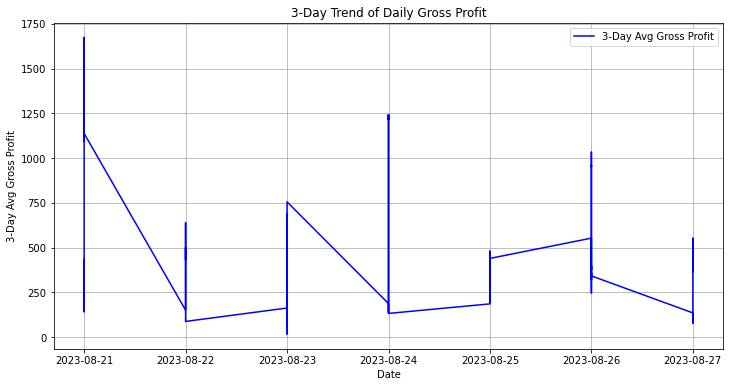

In [25]:
import matplotlib.pyplot as plt
# Plot the 3-day trend of daily gross profit
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['3-Day Avg Gross Profit'], label='3-Day Avg Gross Profit', color='blue')
plt.title('3-Day Trend of Daily Gross Profit')
plt.xlabel('Date')
plt.ylabel('3-Day Avg Gross Profit')
plt.grid(True)
plt.legend()
plt.show()


In [30]:
# Calculate gross profit with Vendor 4
gross_profit_with_vendor4 = (data[data['Firm bought from'] == 'Vendor4']['Selling price'] - data[data['Firm bought from'] == 'Vendor4']['Buying price']).mean()

# Calculate gross profit without Vendor 4
data_without_vendor4 = data[data['Firm bought from'] != 'Vendor4']
gross_profit_without_vendor4 = (data_without_vendor4['Selling price'] - data_without_vendor4['Buying price']).mean()

# Calculate the impact on gross margin
impact_on_gross_margin = gross_profit_with_vendor4 - gross_profit_without_vendor4

print(f"1. Impact on Gross Margin by Honoring Vendor 4: {impact_on_gross_margin}")


1. Impact on Gross Margin by Honoring Vendor 4: 1.899635701275045


In [31]:
# Calculate the average gross margin for each vendor
vendor_avg_margin = data.groupby('Firm bought from')['Gross Profit'].mean()

# Identify the vendor with the highest average gross margin
highest_margin_vendor = vendor_avg_margin.idxmax()

# Calculate the theoretical maximum margin by sourcing only from the highest margin vendor
theoretical_max_margin = vendor_avg_margin.max()

print(f"2. Vendor with Highest Gross Margin for Strategic Tie-Up: {highest_margin_vendor}")
print(f"Theoretical Maximum Gross Margin: {theoretical_max_margin}")


2. Vendor with Highest Gross Margin for Strategic Tie-Up: Vendor3
Theoretical Maximum Gross Margin: 1061.7783333333334


In [32]:
import statsmodels.api as sm

# Assuming you have price and quantity data
X = data['Selling price']
y = data['Quantity sold']

X = sm.add_constant(X)  # Add a constant for the intercept
model = sm.OLS(y, X).fit()
elasticity = model.params['Selling price']

print(f"Price Elasticity: {elasticity}")


C:\Users\gokul\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


Price Elasticity: 0.023832881149938888


C:\Users\gokul\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
